# PYROOT

In [1]:
# system
import os,sys

# ROOT
sys.path.append(os.environ['ROOT_PATH'] + "/lib")
import ROOT
from ROOT import TCanvas, gPad

import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook'])
import tqdm

Welcome to JupyROOT 6.24/06


In [20]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
# Setting
data_path = os.path.join(".", "build")
root_file = ROOT.TFile(os.path.join(data_path, "GAGG.root"))
root_file.Print()

TFile: name=./build/GAGG.root, title=, option=READ


In [3]:
keys = root_file.GetListOfKeys()
keys.Print()

Collection name='THashList', class='THashList', size=7
 TKey Name = E_radiation, Title = Time = 1ks+, Cycle = 6
 TKey Name = E_radiation, Title = Time = 1ks, Cycle = 5
 TKey Name = E_radiation, Title = Time = 100s, Cycle = 4
 TKey Name = E_radiation, Title = Time = 10s, Cycle = 3
 TKey Name = E_radiation, Title = Time = 1s, Cycle = 2
 TKey Name = E_radiation, Title = Time = 1ns, Cycle = 1
 TKey Name = Time_Energy, Title = time_eng, Cycle = 1


In [4]:
# reset name
for key in keys:
    name = key.GetName()
    title = key.GetTitle()
    cycle = key.GetCycle()
    root_file.GetKey(name, cycle).SetName(f"{name}_{cycle}")
    # root_file.Get(f"{name}_{cycle}").SetName(f"{name}_{cycle}")

In [5]:
keys = root_file.GetListOfKeys()
keys.Print()

Collection name='THashList', class='THashList', size=7
 TKey Name = E_radiation_6, Title = Time = 1ks+, Cycle = 6
 TKey Name = E_radiation_5, Title = Time = 1ks, Cycle = 5
 TKey Name = E_radiation_4, Title = Time = 100s, Cycle = 4
 TKey Name = E_radiation_3, Title = Time = 10s, Cycle = 3
 TKey Name = E_radiation_2, Title = Time = 1s, Cycle = 2
 TKey Name = E_radiation_1, Title = Time = 1ns, Cycle = 1
 TKey Name = Time_Energy_1, Title = time_eng, Cycle = 1


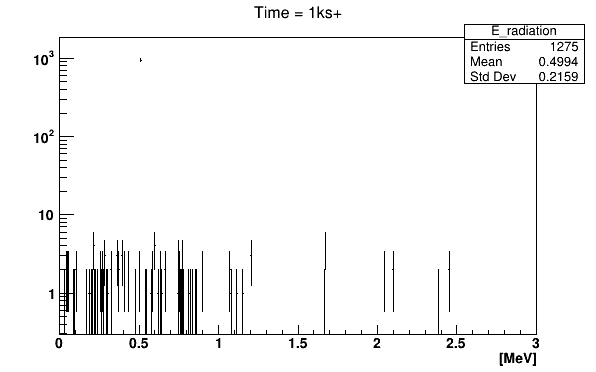

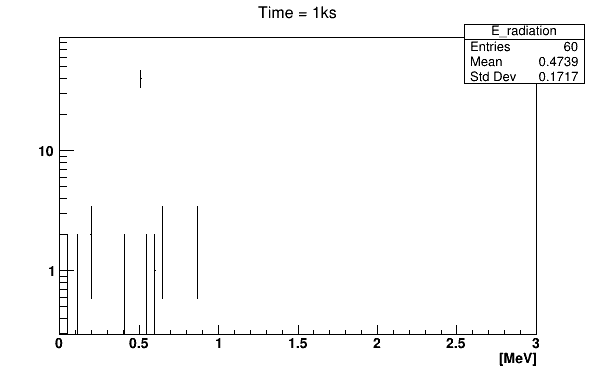

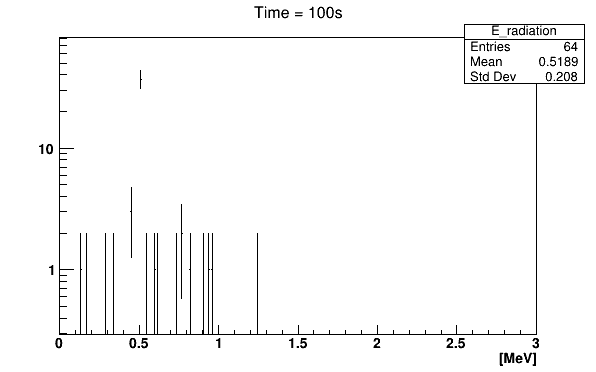

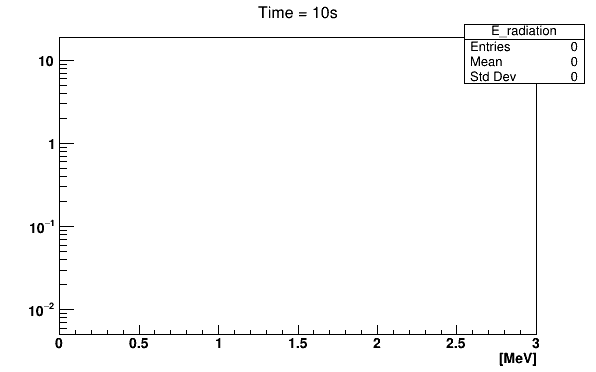

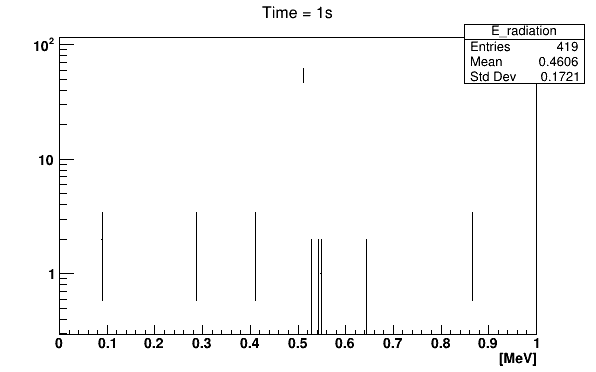

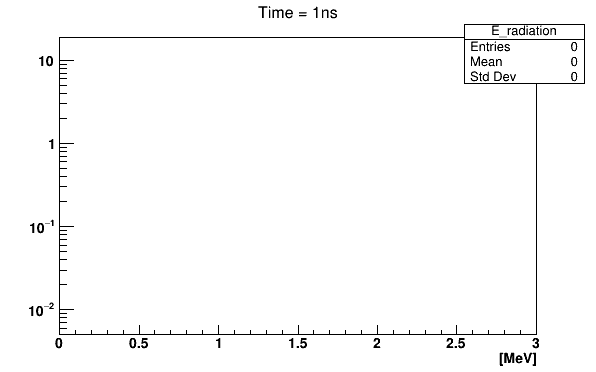

In [22]:
flag_logy = True

canvans = {}
hist = {}
for key in keys:
    name = key.GetName()
    title = key.GetTitle()
    cycle = key.GetCycle()
    
    canvans[f"{name}"] = TCanvas(f"canvas_{cycle}", "", 600, 400, 600, 400)
    hist[f"{name}"] = root_file.Get(f"{name}")
    hist[f"{name}"].Draw()
    canvans[f"{name}"].Draw()
    if flag_logy:
        gPad.SetLogy()

In [10]:
key = keys[-1]
data = []
error = []
energy = []

name = key.GetName()
title = key.GetTitle()

tree = root_file.Get(name)

entries = int(tree.GetSize())
for index, event in zip(tqdm.trange(entries), tree):
    data.append(event)
    error.append(tree.GetBinError(index))
    energy.append(tree.GetBinCenter(index))

100%|██████████| 10404/10404 [00:00<00:00, 57710.31it/s]
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 

In [6]:
datas = {}
errors = {}
energys = {}

for key in keys:
    data = []
    error = []
    energy = []

    name = key.GetName()
    title = key.GetTitle()
    cycle = key.GetCycle()
    
    tree = root_file.Get(name)
    if cycle == 6:
        # for test
        name_ = name
        tree_ = tree
    
    entries = int(tree.GetSize())
    for index, event in zip(tqdm.trange(entries), tree):
        data.append(event)
        error.append(tree.GetBinError(index))
        energy.append(tree.GetBinCenter(index))
    
    datas[name] = data
    errors[name] = error
    energys[name] = energy

100%|██████████| 10404/10404 [00:00<00:00, 66953.39it/s]
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 2-d histogram - return a NaN
Error in <TH2D::GetBinCenter>: Invalid method for a 

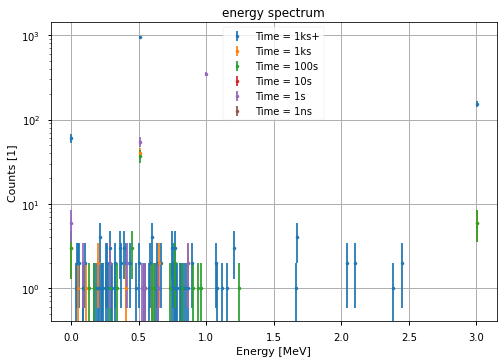

In [24]:
for key in keys:
    name = key.GetName()
    title = key.GetTitle()
    cycle = key.GetCycle()

    plt.errorbar(energys[name], datas[name], yerr=errors[name],label=title, capsize=3, fmt=".")
plt.grid()
plt.legend()
plt.xlabel("Energy [MeV]")
plt.ylabel("Counts [1]")
plt.title("energy spectrum")
plt.yscale('log')
plt.show()

# 产生核素的分析

In [9]:
# 对数据进行处理，将Geant4直接输出的核素进行归纳整理
# # 过滤掉 ignoreList = ['stable','fs','ps','ns','us','eV','+'] 的核素
# # 合并同质异能素

import os,sys 
os.chdir(sys.path[0])
os.chdir('../build_1e5s/output')

for eachfile in os.listdir():
    if "Simple" in eachfile: # 跳过简单的数据列表
        continue
    
    with open(eachfile,'r') as f:
        data = f.readlines()[2:]
        print(eachfile)

    nuclied = dict()
    ignoreList = ['stable','fs','ps','ns','us','eV','+']
    for aux in data:
        aux = aux.split("\t")
        for igList in ignoreList: # 跳过稳定、超短寿命的核素不做统计
            if igList in aux[-1].split("\n")[0]:
                isJump = 1
        if isJump:
            isJump = 0
            continue
        try:
            nuclied[aux[0].split("[")[0]] = [int(nuclied[aux[0].split("[")[0]][0])+int(aux[1]),aux[-1].split("\n")[0]]
        except: # 如果报错的话，说明对nuclied索引错误，因为还没有建立该条目
            try: # 那么建立该条目
                nuclied[aux[0].split("[")[0]] = [int(aux[1]),aux[-1].split("\n")[0]]
            except:
                # 跳过读取的文件行"---------- run 0 -----------"
                # 这样可能有问题，因为多次写入的文档不一定是我们想要的
                continue 

    with open("processed_"+eachfile, 'w') as file:
        for item in sorted(nuclied.items(),key = lambda x:x[1],reverse = True):
            dataString = "%s,%s,%s\n" %(item[0],item[1][0],item[1][1])
            file.write(dataString)

In [10]:
sorted(nuclied.items(),key = lambda x:x[1],reverse = True)

[('neutron', [836607, '14.67 min']),
 ('triton', [7256, '12.32 y  ']),
 ('Ga68', [6880, '1.62808 h  ']),
 ('Gd153', [6707, '346.824 d  ']),
 ('O15', [6535, '2.93925 min']),
 ('Gd151', [4639, '178.75 d  ']),
 ('Ga67', [4475, '4.70564 d  ']),
 ('Tb155', [3900, '7.67514 d  ']),
 ('Eu149', [3627, '134.315 d  ']),
 ('Tb153', [3570, '3.37591 d  ']),
 ('Tb154', [3246, '1.29241 d  ']),
 ('C14', [2878, '8229 y  ']),
 ('Gd149', [2626, '13.3882 d  ']),
 ('Zn65', [2606, '351.917 d  ']),
 ('Ge68', [2587, '1.07087 y  ']),
 ('Tb152', [2482, '1.05197 d  ']),
 ('Eu147', [2372, '34.7689 d  ']),
 ('Tb156', [2342, '7.71842 d  ']),
 ('Gd148', [2280, '102.646 y  ']),
 ('Ga70', [2276, '30.4986 min']),
 ('Tb151', [2132, '1.05852 d  ']),
 ('Tb157', [2117, '102.502 y  ']),
 ('Eu146', [2066, '6.65082 d  ']),
 ('Pm145', [1816, '25.5532 y  ']),
 ('Sm145', [1716, '1.34388 y  ']),
 ('Gd147', [1622, '2.28787 d  ']),
 ('Ge69', [1592, '2.34739 d  ']),
 ('Gd146', [1502, '69.6389 d  ']),
 ('Eu145', [1400, '8.55518 d  '])